## Début de l'analyse univariée en cellule 13

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns                    # Heatmap


data = pd.read_csv("operations_enrichies.csv", parse_dates=[0])

# Représenter une variable sous forme de graphique

In [2]:
data['categ'].value_counts(normalize=True).plot(kind='bar')
plt.title('Catégories de dépenses')
plt.show()

In [3]:
data[data.montant.abs() < 100]["montant"].hist(normed=True,bins=20)
plt.title('Histogramme des montants')
plt.show()

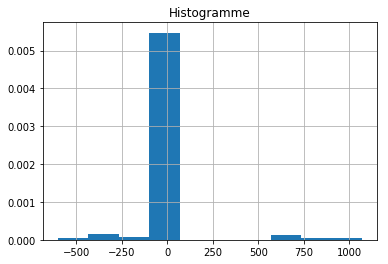

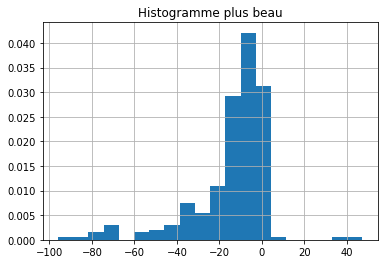

In [4]:
# VARIABLE QUALITATIVE
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.title('Diagramme en secteur')
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.title('Diagramme en tuyaux d\'orgues')
plt.show()

# VARIABLE QUANTITATIVE
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.title('Diagramme en bâtons')
plt.show()

# Histogramme
data["montant"].hist(normed=True)
plt.title('Histogramme')
plt.show()
# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(normed=True,bins=20)
plt.title('Histogramme plus beau')
plt.show()

# Représenter une variable sous forme de tableau

In [5]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index

In [6]:
tab = pd.DataFrame(modalites, columns = ["quart_mois"])

In [7]:
tab

quart_mois
0           1
1           2
2           3
3           4

In [8]:
tab["n"] = effectifs.values

In [9]:
tab

quart_mois   n
0           1  86
1           2  76
2           3  75
3           4  71

In [10]:
tab["f"] = tab["n"] / len(data) # Fréquences

In [11]:
tab

quart_mois   n         f
0           1  86  0.279221
1           2  76  0.246753
2           3  75  0.243506
3           4  71  0.230519

In [12]:
tab = tab.sort_values("quart_mois")
tab["F"] = tab["f"].cumsum() # Fréquences cumulées croissantes
tab

quart_mois   n         f         F
0           1  86  0.279221  0.279221
1           2  76  0.246753  0.525974
2           3  75  0.243506  0.769481
3           4  71  0.230519  1.000000

# Mesures de tendance centrale, de dispersion et de forme

In [13]:
data['montant'].mean()

2.872564935064941

In [14]:
data['montant'].median()

-9.6

--------------------
AUTRE
moy:
 26.204234693877574
med:
 -8.0
var:
 43597.28163972046
std:
 208.79962078442685
skw:
 2.97403633289
kur:
 11.4588822634


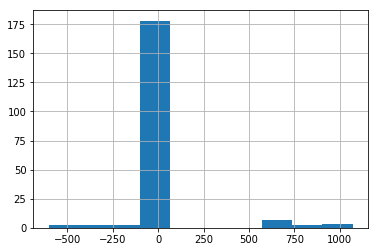

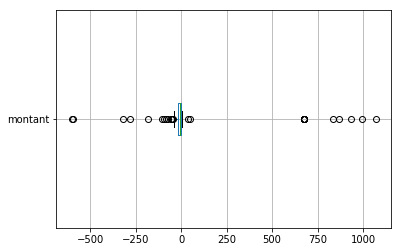

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
var:
 2205.016868027212
std:
 46.95760713694014
skw:
 -1.24826507622
kur:
 2.19227053269


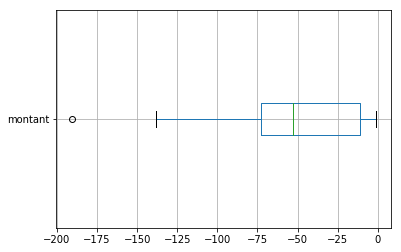

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
var:
 105.01905306122445
std:
 10.247880417980317
skw:
 -2.38765145643
kur:
 5.79856336789


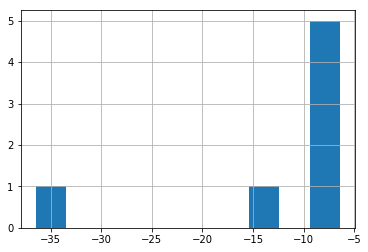

--------------------
COURSES
moy:
 -14.645454545454548
med:
 -10.91
var:
 135.79972661157024
std:
 11.653313975499426
skw:
 -1.68565178021
kur:
 3.41278562078


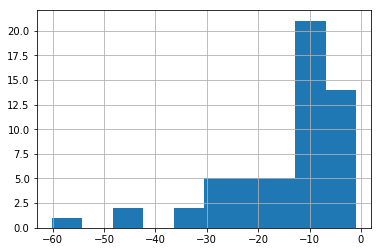

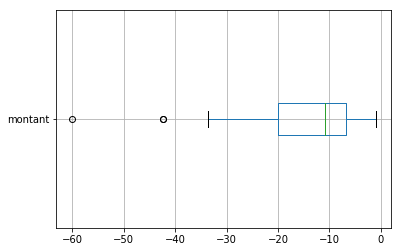

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
var:
 0.0015673469387755044
std:
 0.03958973274443141
skw:
 0.374165738677
kur:
 -2.8


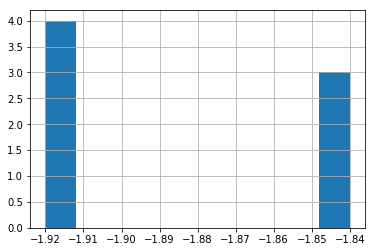

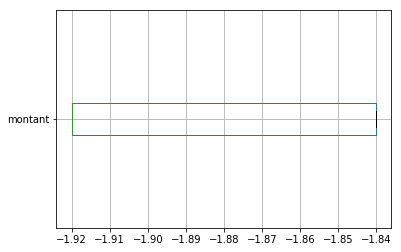

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
var:
 2.853193750000001
std:
 1.689139943876765
skw:
 -0.888350348716
kur:
 0.598885559169


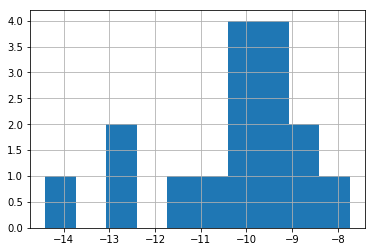

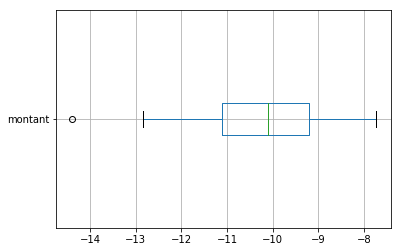

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
var:
 0.0
std:
 0.0
skw:
 0
kur:
 0


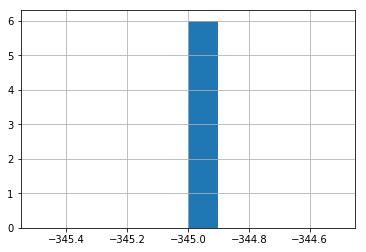

In [15]:
for cat in data["categ"].unique():
    sous_echantillon = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",sous_echantillon['montant'].mean())
    print("med:\n",sous_echantillon['montant'].median())
    print("var:\n",sous_echantillon['montant'].var(ddof=0))
    print("std:\n",sous_echantillon['montant'].std(ddof=0))
    print("skw:\n",sous_echantillon['montant'].skew())
    print("kur:\n",sous_echantillon['montant'].kurtosis())
    sous_echantillon["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    sous_echantillon.boxplot(column="montant", vert=False)
    plt.show()

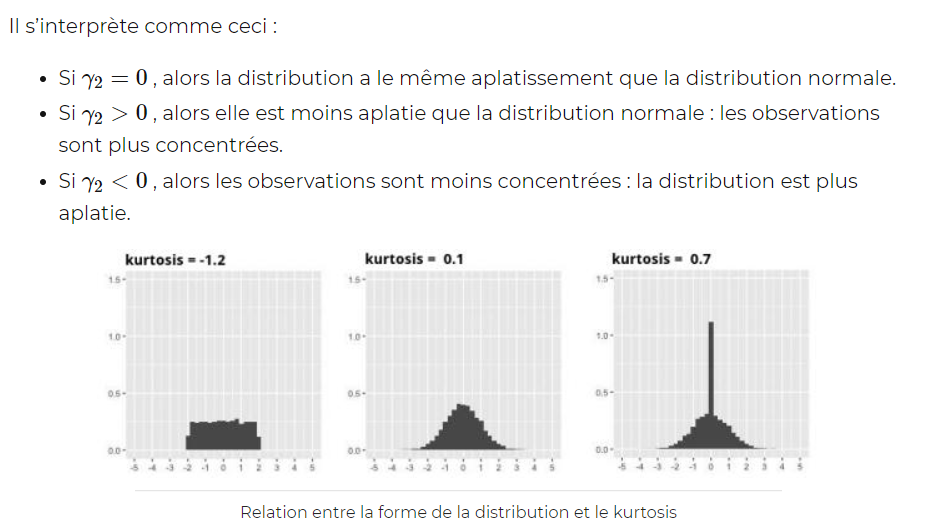

# Mesures de concentration

### Courbe de Lorenz

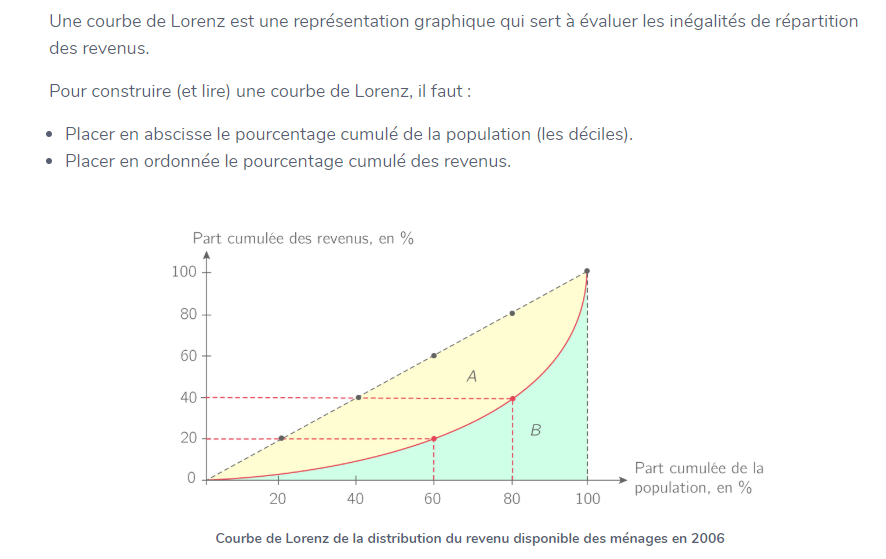

In [16]:
import numpy as np

depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.show()

### Indice de Gini

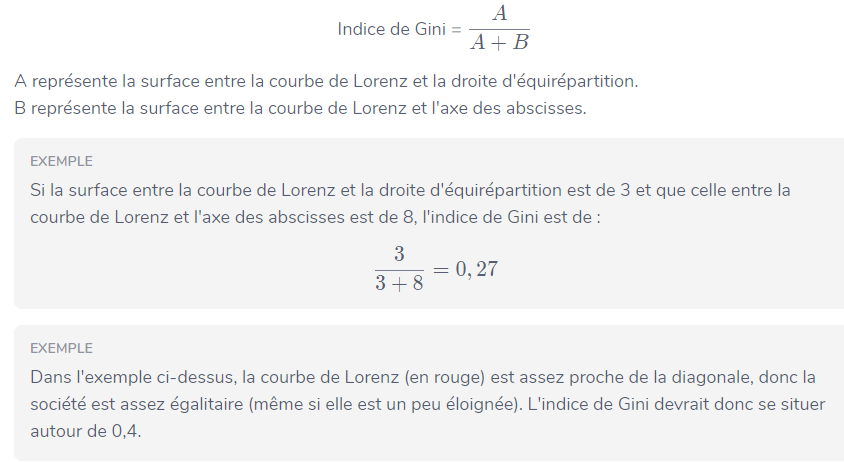

In [17]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.72482074068428193

On sélectionne tout d'abord le sous-échantillon de travail que l'on appelle  depenses  . Comme évoqué pus haut, il faut trier les individus dans l'ordre croissant des valeurs de la variable; nous le faisons ici grâce à  np.sort(dep)  , car  dep  contient les observations de la variable montant. Ensuite, nous calculons la somme cumulée grâce à  np.cumsum()  . Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum()  . La variable  lorenz  contient les ordonnées des points, mais il nous faut maintenant leurs abscisses : celles-ci s'étendent de 0 à 1 (comme évoqué précédemment) à intervalle réguliers. C'est ce que produit  np.linspace(0,1,len(lorenz))  

Et enfin on calcule l'indice de Gini